# Exploratory cerium plots with base MWM DR19 data

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy import stats

import paths
from utils import get_color_list
from mwm_sample import abundance_ratio

In [81]:
plt.style.use(paths.styles / 'notebook.mplstyle')

In [5]:
mwm_rgb = pd.read_csv(paths.data / 'MWM' / 'MWM_RGB.csv')
mwm_rgb

/var/folders/_s/lknhlnjn1g1cj388brpgztf80000gn/T/ipykernel_29953/610113364.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  mwm_rgb = pd.read_csv(paths.data / 'MWM' / 'MWM_RGB.csv')


sdss_id     sdss4_apogee_id  ...     gal_phi     gal_z
0        54381291                 NaN  ...  153.313414 -0.663968
1        54381397                 NaN  ...  161.379103 -0.379658
2        54381405                 NaN  ...  162.308315 -0.351110
3        54381758  2M00204981+5625073  ...  154.781406 -0.610219
4        54381959  2M00224114+5636475  ...  170.227131 -0.163923
...           ...                 ...  ...         ...       ...
181119  129060878  2M11484212-6220219  ... -141.850596 -0.016213
181120  129060884  2M09110058-4849577  ... -151.641683 -0.014818
181121  129060885  2M08333243-3911278  ... -154.976288  0.061825
181122  129060909  2M13582184-6202236  ... -160.900700  0.007032
181123  129060928  2M18243818-1635046  ...  155.238996 -0.154734

[181124 rows x 404 columns]

In [6]:
mwm_rgb['ce_fe'], mwm_rgb['e_ce_fe'] = abundance_ratio(mwm_rgb, 'ce', 'fe')
mwm_rgb

sdss_id     sdss4_apogee_id  ...     ce_fe   e_ce_fe
0        54381291                 NaN  ...  0.097161  0.048916
1        54381397                 NaN  ...  0.211740  0.049026
2        54381405                 NaN  ...  0.303631  0.047972
3        54381758  2M00204981+5625073  ...  0.026801  0.048889
4        54381959  2M00224114+5636475  ...  0.269971  0.047635
...           ...                 ...  ...       ...       ...
181119  129060878  2M11484212-6220219  ...  0.057346  0.048814
181120  129060884  2M09110058-4849577  ...  0.243421  0.048431
181121  129060885  2M08333243-3911278  ...  0.179331  0.048814
181122  129060909  2M13582184-6202236  ...  0.011881  0.048341
181123  129060928  2M18243818-1635046  ... -0.099683  0.049010

[181124 rows x 406 columns]

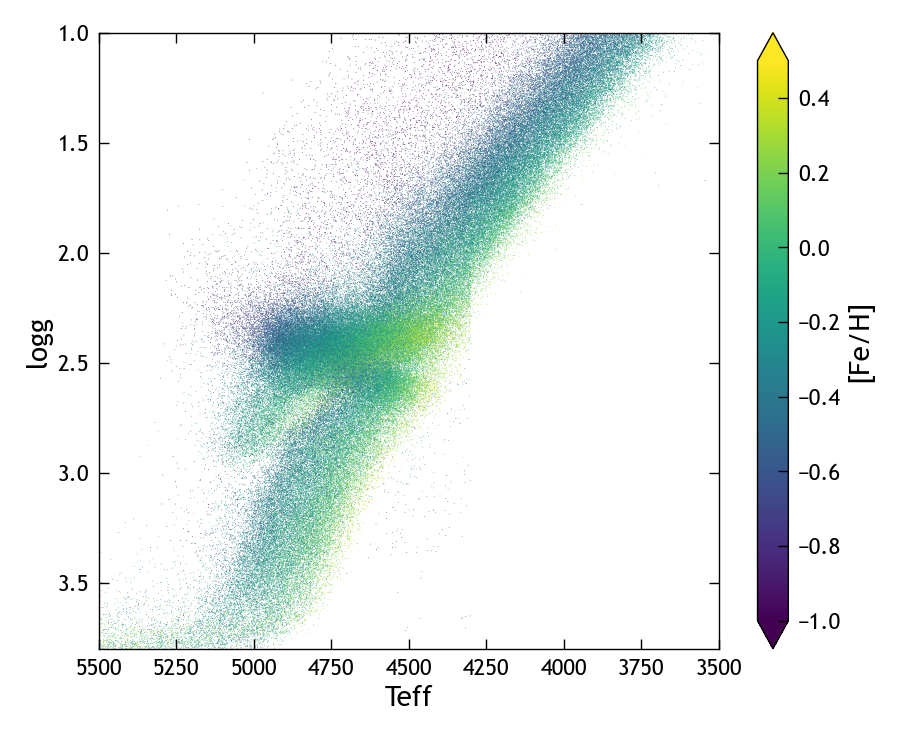

In [88]:
fig, ax = plt.subplots(figsize=(5, 4))
kwargs = dict(s=0.3, marker='.', rasterized=True, edgecolor='none')
pc = ax.scatter(mwm_rgb['teff'], mwm_rgb['logg'], c=mwm_rgb['fe_h'], vmin=-1, vmax=0.5, **kwargs)
fig.colorbar(pc, ax=ax, label='[Fe/H]', extend='both')
ax.set_xlim((5500, 3500))
ax.set_ylim((3.8, 1))
ax.set_xlabel('Teff')
ax.set_ylabel('logg')
plt.show()

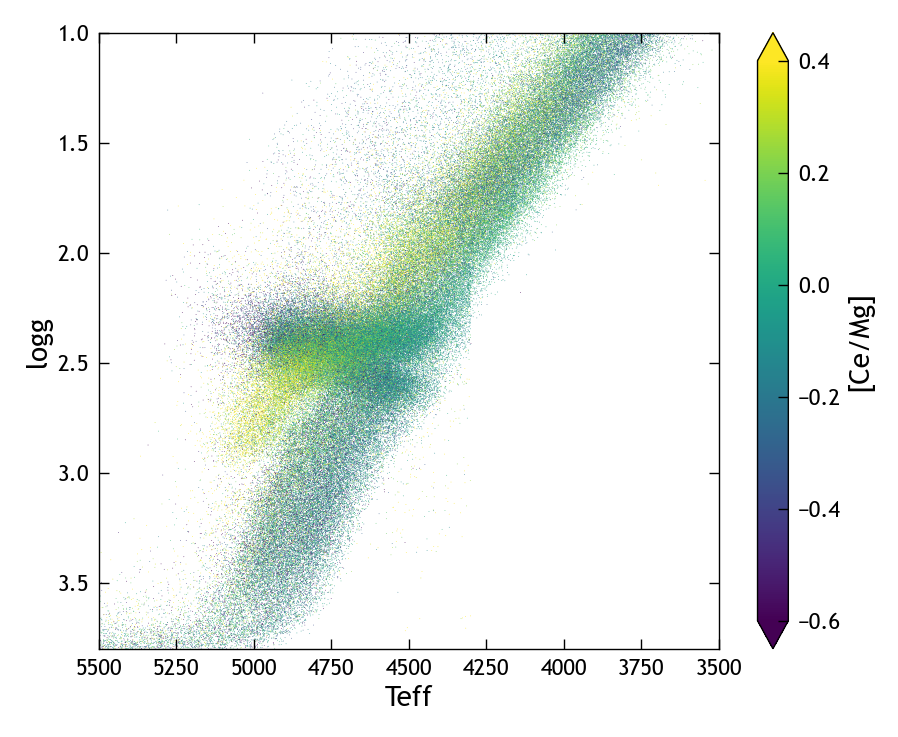

In [90]:
fig, ax = plt.subplots(figsize=(5, 4))
kwargs = dict(s=0.3, marker='.', rasterized=True, edgecolor='none')
pc = ax.scatter(mwm_rgb['teff'], mwm_rgb['logg'], c=mwm_rgb['ce_mg'], vmin=-0.6, vmax=0.4, **kwargs)
fig.colorbar(pc, ax=ax, label='[Ce/Mg]', extend='both')
ax.set_xlim((5500, 3500))
ax.set_ylim((3.8, 1))
ax.set_xlabel('Teff')
ax.set_ylabel('logg')
plt.show()

## Solar Neighborhood

In [7]:
mwm_rgb_local = mwm_rgb[
    (mwm_rgb['gal_r'] >= 7) &
    (mwm_rgb['gal_r'] < 9) &
    (mwm_rgb['gal_z'].abs() < 2)
]
mwm_rgb_local

sdss_id     sdss4_apogee_id  ...     ce_fe   e_ce_fe
5        54381962                 NaN  ...  0.239731  0.048096
19       54382295                 NaN  ...  0.177620  0.051042
27       54382700  2M00200721+5700122  ...  0.219099  0.047857
41       54383125  2M00304259+5618336  ...  0.128688  0.048078
61       54383757  2M00290801+5640111  ...  0.021089  0.047683
...           ...                 ...  ...       ...       ...
181096  129060702  2M09103407-4845571  ...  0.232956  0.049357
181103  129060768  2M09150089-4756448  ...  0.039286  0.048835
181106  129060777  2M09120875-4832413  ...  0.120101  0.048813
181117  129060864  2M09093978-4751104  ...  0.263877  0.049065
181119  129060878  2M11484212-6220219  ...  0.057346  0.048814

[64661 rows x 406 columns]

In [8]:
def alpha_cut(feh):
    """Returns [Mg/Fe] cut as function of [Fe/H]."""
    return np.where(
        feh >= 0.0,
        0.1,
        0.1 - 0.13*feh
    )

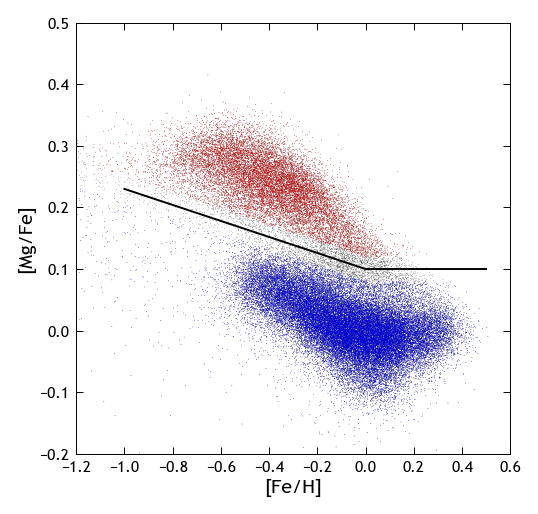

In [9]:
ms = 0.3

fig, ax = plt.subplots()
ax.scatter(
    mwm_rgb_local['fe_h'], mwm_rgb_local['mg_fe'], 
    s=ms, marker='.', rasterized=True, edgecolor='none', c='k'
)
feh_arr = np.arange(-1., 0.51, 0.1)
ax.plot(feh_arr, alpha_cut(feh_arr), c='k')
# high-alpha
alpha_buffer = 0.02
local_high_alpha = mwm_rgb_local[
    mwm_rgb_local['mg_fe'] > alpha_cut(mwm_rgb_local['fe_h']) + alpha_buffer
]
ax.scatter(
    local_high_alpha['fe_h'], local_high_alpha['mg_fe'], 
    s=ms, marker='.', rasterized=True, edgecolor='none', c='r'
)
# low-alpha
local_low_alpha = mwm_rgb_local[
    mwm_rgb_local['mg_fe'] < alpha_cut(mwm_rgb_local['fe_h']) - alpha_buffer
]
ax.scatter(
    local_low_alpha['fe_h'], local_low_alpha['mg_fe'], 
    s=ms, marker='.', rasterized=True, edgecolor='none', c='b'
)
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[Mg/Fe]')
ax.set_xlim((-1.2, 0.6))
ax.set_ylim((-0.2, 0.5))
plt.show()

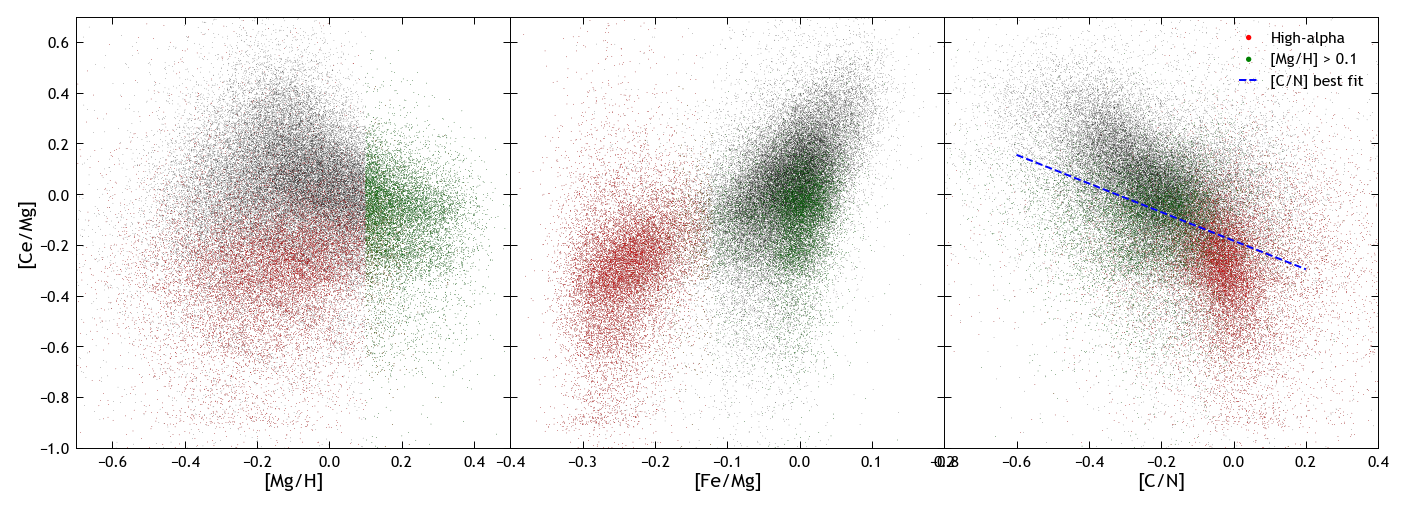

In [74]:
kwargs = dict(s=0.3, marker='.', rasterized=True, edgecolor='none')

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True, gridspec_kw={'wspace': 0.})

# Full sample
axs[0].scatter(mwm_rgb_local['mg_h'], mwm_rgb_local['ce_mg'], c='k', **kwargs)
axs[1].scatter(-mwm_rgb_local['mg_fe'], mwm_rgb_local['ce_mg'], c='k', **kwargs)
axs[2].scatter(mwm_rgb_local['c_n'], mwm_rgb_local['ce_mg'], c='k', **kwargs)

# High-alpha
axs[0].scatter(local_high_alpha['mg_h'], local_high_alpha['ce_mg'], c='r', **kwargs)
axs[1].scatter(-local_high_alpha['mg_fe'], local_high_alpha['ce_mg'], c='r', **kwargs)
axs[2].scatter(local_high_alpha['c_n'], local_high_alpha['ce_mg'], c='r', **kwargs, label='High-alpha')

# Local metal-rich
local_metal_rich = mwm_rgb_local[mwm_rgb_local['mg_h'] > 0.1]
axs[0].scatter(local_metal_rich['mg_h'], local_metal_rich['ce_mg'], c='g', **kwargs)
axs[1].scatter(-local_metal_rich['mg_fe'], local_metal_rich['ce_mg'], c='g', **kwargs)
axs[2].scatter(local_metal_rich['c_n'], local_metal_rich['ce_mg'], c='g', **kwargs, label='[Mg/H] > 0.1')

# [C/N] linear regression
cn_linreg = stats.linregress(mwm_rgb_local['c_n'], mwm_rgb_local['ce_mg'], 
                             nan_policy='omit')
xarr = np.arange(-0.6, 0.3, 0.1)
axs[2].plot(xarr, cn_linreg.intercept + cn_linreg.slope * xarr, 'b--',
            label='[C/N] best fit')

axs[0].set_ylabel('[Ce/Mg]')
axs[0].set_xlabel('[Mg/H]')
axs[1].set_xlabel('[Fe/Mg]')
axs[2].set_xlabel('[C/N]')

axs[0].set_ylim((-1, 0.7))
axs[0].set_xlim((-0.7, 0.5))
axs[1].set_xlim((-0.4, 0.2))
axs[2].set_xlim((-0.8, 0.4))

axs[2].legend(markerscale=10, loc='upper right')

plt.show()

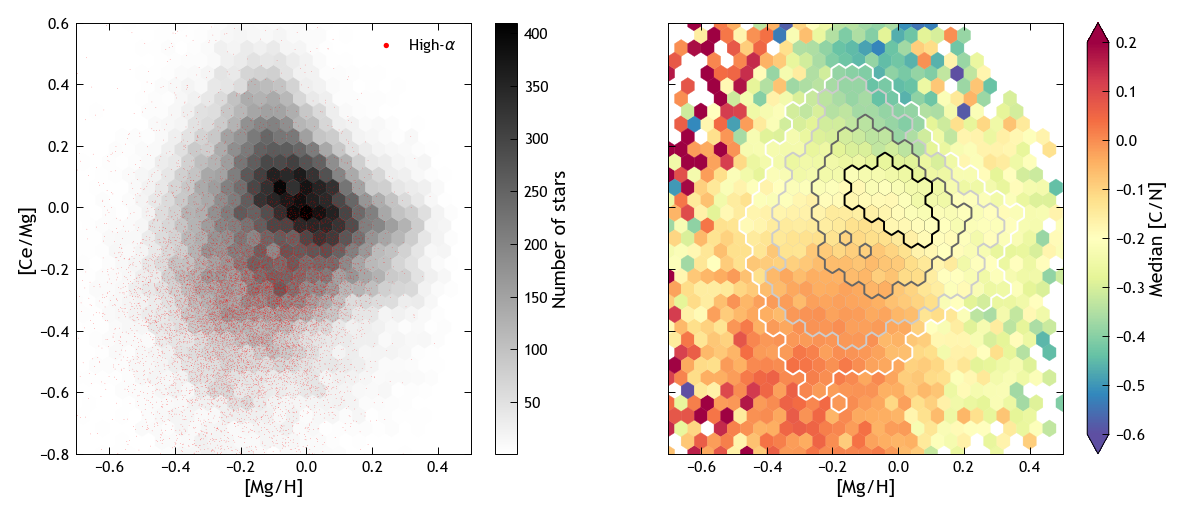

In [11]:
gridsize = 30
xlim = (-0.7, 0.5)
ylim = (-0.8, 0.6)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=140, sharex=True, sharey=True)

# Plot number density
pcm0 = axs[0].hexbin(
    mwm_rgb_local['mg_h'], mwm_rgb_local['ce_mg'], 
    C=np.ones(mwm_rgb_local.shape[0]),
    reduce_C_function=np.sum,
    gridsize=gridsize, cmap='binary', linewidths=0.2,
    extent=[xlim[0], xlim[1], ylim[0], ylim[1]]
)
# Indicate high-alpha stars
axs[0].scatter(
    local_high_alpha['mg_h'], local_high_alpha['ce_mg'], 
    s=0.3, marker='.', rasterized=True, edgecolor='none', c='r',
    label = r'High-$\alpha$'
)
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')
axs[0].legend(frameon=False, markerscale=10)

# Plot median age
cfg = dict(
    x=mwm_rgb_local['mg_h'], 
    y=mwm_rgb_local['ce_mg'], 
    C=mwm_rgb_local['c_n'],
    reduce_C_function=np.median,
    gridsize=gridsize, 
    cmap='Spectral_r',
    extent=[xlim[0], xlim[1], ylim[0], ylim[1]]
)
pcm1 = axs[1].hexbin(**cfg, linewidths=0.2, zorder=1, vmin=-0.6, vmax=0.2)
cfg = {**cfg, 'vmin': pcm1.get_clim()[0], 'vmax': pcm1.get_clim()[1]}
# draw thick white contours
contours = [50, 100, 200, 300]
# colors = ['#cccccc', '#999999', '#666666', '#333333', '#000000']
colors = get_color_list(plt.get_cmap('binary'), contours + [1000])
for i, count in enumerate(contours):
    axs[1].hexbin(edgecolors=colors[i], lw=2, zorder=i+1, mincnt=count, **cfg)
    axs[1].hexbin(edgecolors='none', lw=0.2, zorder=i+2, mincnt=count, **cfg)
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical', extend='both')
cbar.ax.set_ylabel('Median [C/N]')

axs[0].set_xlabel('[Mg/H]')
axs[1].set_xlabel('[Mg/H]')
axs[0].set_ylabel('[Ce/Mg]')
axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)
plt.show()

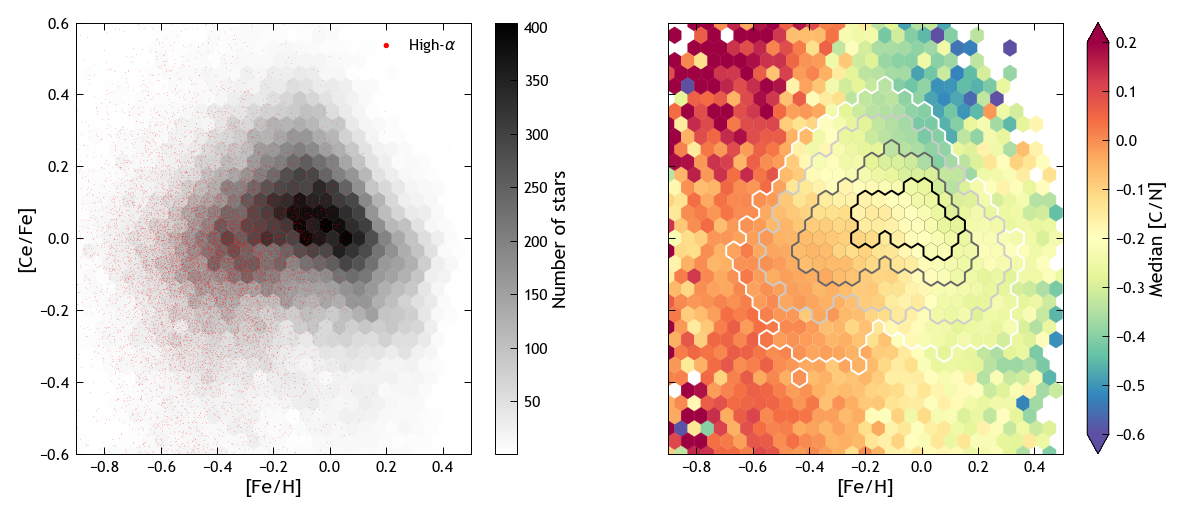

In [17]:
gridsize = 30
xlim = (-0.9, 0.5)
ylim = (-0.6, 0.6)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=140, sharex=True, sharey=True)

# Plot number density
pcm0 = axs[0].hexbin(
    mwm_rgb_local['fe_h'], mwm_rgb_local['ce_fe'], 
    C=np.ones(mwm_rgb_local.shape[0]),
    reduce_C_function=np.sum,
    gridsize=gridsize, cmap='binary', linewidths=0.2,
    extent=[xlim[0], xlim[1], ylim[0], ylim[1]]
)
# Indicate high-alpha stars
axs[0].scatter(
    local_high_alpha['fe_h'], local_high_alpha['ce_fe'], 
    s=0.3, marker='.', rasterized=True, edgecolor='none', c='r',
    label = r'High-$\alpha$'
)
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')
axs[0].legend(frameon=False, markerscale=10)

# Plot median age
cfg = dict(
    x=mwm_rgb_local['fe_h'], 
    y=mwm_rgb_local['ce_fe'], 
    C=mwm_rgb_local['c_n'],
    reduce_C_function=np.median,
    gridsize=gridsize, 
    cmap='Spectral_r',
    extent=[xlim[0], xlim[1], ylim[0], ylim[1]]
)
pcm1 = axs[1].hexbin(**cfg, linewidths=0.2, zorder=1, vmin=-0.6, vmax=0.2)
cfg = {**cfg, 'vmin': pcm1.get_clim()[0], 'vmax': pcm1.get_clim()[1]}
# draw thick white contours
contours = [50, 100, 200, 300]
# colors = ['#cccccc', '#999999', '#666666', '#333333', '#000000']
colors = get_color_list(plt.get_cmap('binary'), contours + [1000])
for i, count in enumerate(contours):
    axs[1].hexbin(edgecolors=colors[i], lw=2, zorder=i+1, mincnt=count, **cfg)
    axs[1].hexbin(edgecolors='none', lw=0.2, zorder=i+2, mincnt=count, **cfg)
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical', extend='both')
cbar.ax.set_ylabel('Median [C/N]')

axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[Ce/Fe]')
axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)
plt.show()

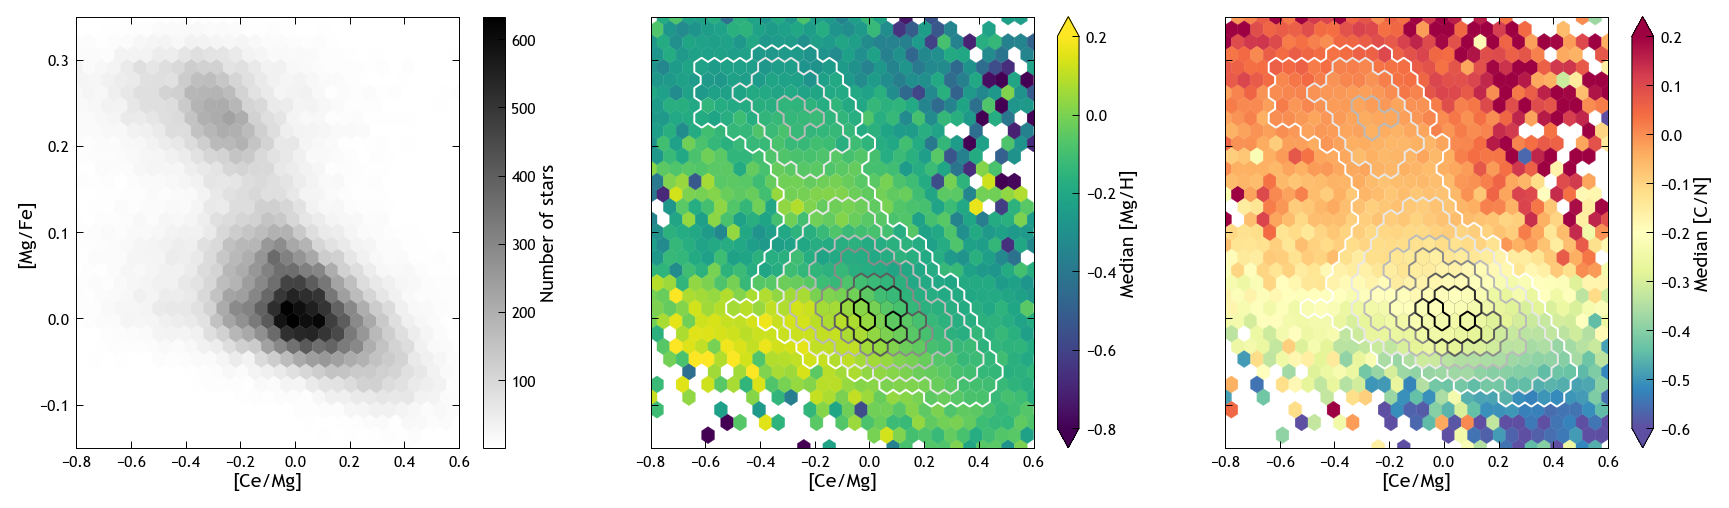

In [30]:
gridsize = 30
ylim = (-0.15, 0.35)
xlim = (-0.8, 0.6)

fig, axs = plt.subplots(1, 3, figsize=(15, 4), dpi=140, sharex=True, sharey=True)

# Plot number density
pcm0 = axs[0].hexbin(
    mwm_rgb_local['ce_mg'], mwm_rgb_local['mg_fe'], 
    C=np.ones(mwm_rgb_local.shape[0]),
    reduce_C_function=np.sum,
    gridsize=gridsize, cmap='binary', linewidths=0.2,
    extent=[xlim[0], xlim[1], ylim[0], ylim[1]]
)
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')

# Color by metallicity
cfg = dict(
    x=mwm_rgb_local['ce_mg'], 
    y=mwm_rgb_local['mg_fe'], 
    C=mwm_rgb_local['mg_h'],
    reduce_C_function=np.median,
    gridsize=gridsize, 
    cmap='viridis',
    extent=[xlim[0], xlim[1], ylim[0], ylim[1]]
)
pcm1 = axs[1].hexbin(**cfg, linewidths=0.2, zorder=1, vmin=-0.8, vmax=0.2)
cfg = {**cfg, 'vmin': pcm1.get_clim()[0], 'vmax': pcm1.get_clim()[1]}
# draw thick white contours
contours = [50, 100, 200, 300, 400, 500, 600]
colors = get_color_list(plt.get_cmap('binary'), contours + [1000])
for i, count in enumerate(contours):
    axs[1].hexbin(edgecolors=colors[i], lw=2, zorder=i+1, mincnt=count, **cfg)
    axs[1].hexbin(edgecolors='none', lw=0.2, zorder=i+2, mincnt=count, **cfg)
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical', extend='both')
cbar.ax.set_ylabel('Median [Mg/H]')

# Color by median [C/N]
cfg = dict(
    x=mwm_rgb_local['ce_mg'], 
    y=mwm_rgb_local['mg_fe'], 
    C=mwm_rgb_local['c_n'],
    reduce_C_function=np.median,
    gridsize=gridsize, 
    cmap='Spectral_r',
    extent=[xlim[0], xlim[1], ylim[0], ylim[1]]
)
pcm1 = axs[2].hexbin(**cfg, linewidths=0.2, zorder=1, vmin=-0.6, vmax=0.2)
cfg = {**cfg, 'vmin': pcm1.get_clim()[0], 'vmax': pcm1.get_clim()[1]}
# draw thick white contours
colors = get_color_list(plt.get_cmap('binary'), contours + [1000])
for i, count in enumerate(contours):
    axs[2].hexbin(edgecolors=colors[i], lw=2, zorder=i+1, mincnt=count, **cfg)
    axs[2].hexbin(edgecolors='none', lw=0.2, zorder=i+2, mincnt=count, **cfg)
cbar = fig.colorbar(pcm1, ax=axs[2], orientation='vertical', extend='both')
cbar.ax.set_ylabel('Median [C/N]')

axs[0].set_xlabel('[Ce/Mg]')
axs[1].set_xlabel('[Ce/Mg]')
axs[2].set_xlabel('[Ce/Mg]')
axs[0].set_ylabel('[Mg/Fe]')
axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)
plt.show()

## Across the disk

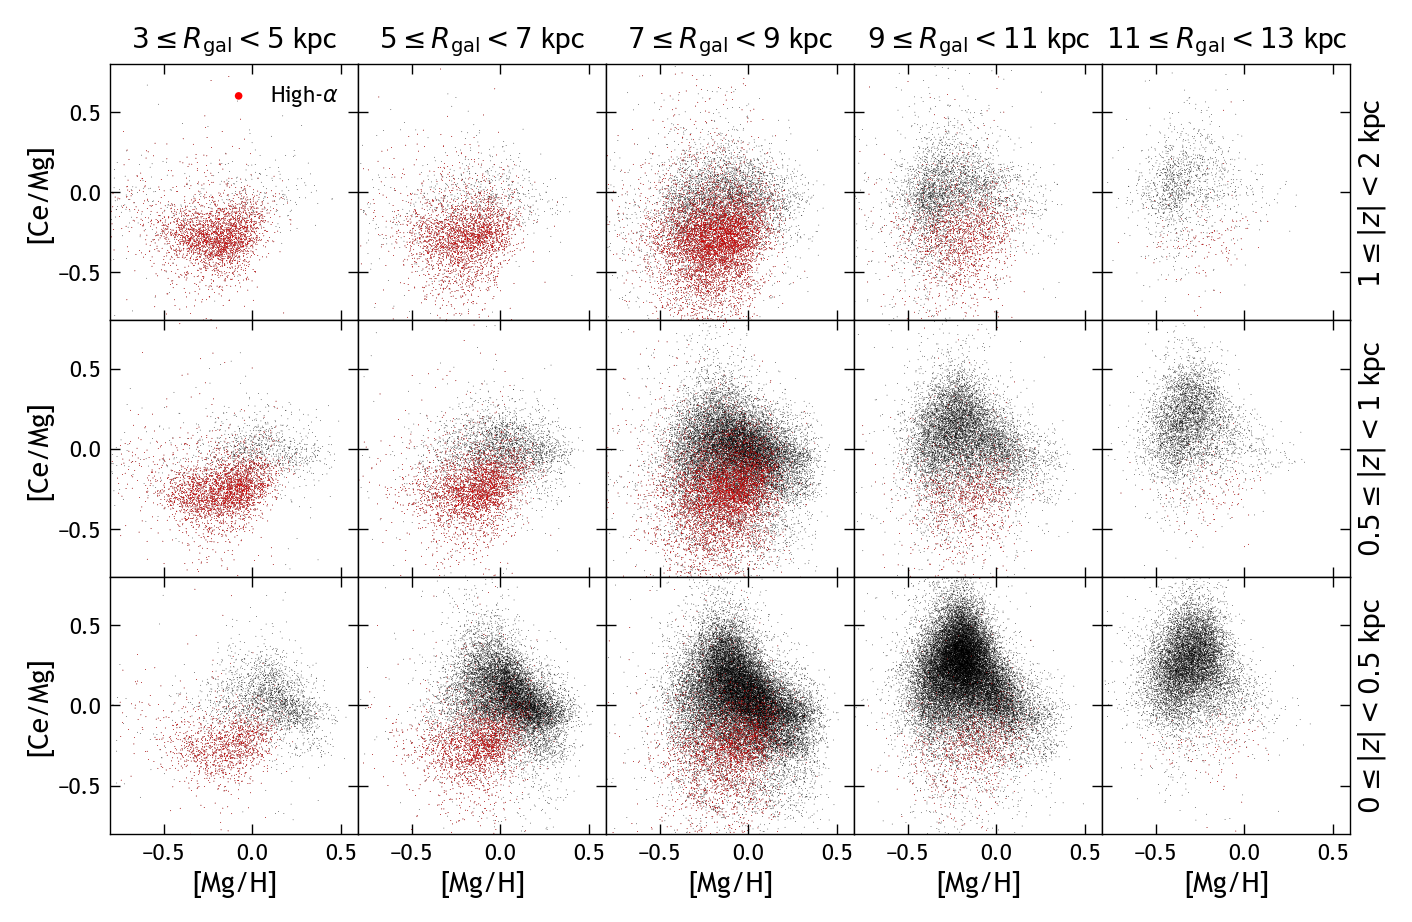

In [78]:
galr_bins = np.arange(3, 15, 2)
absz_bins = [0, 0.5, 1, 2]
alpha_buffer = 0.02

kwargs = dict(s=0.3, marker='.', rasterized=True, edgecolor='none')

fig, axs = plt.subplots(
    len(absz_bins)-1, len(galr_bins)-1,
    figsize=(8, 5), sharex=True, sharey=True,
    gridspec_kw={'hspace': 0, 'wspace': 0},
    dpi=200
)

for i, row in enumerate(axs):
    absz_lim = (absz_bins[-(i+2)], absz_bins[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (galr_bins[j], galr_bins[j+1])
        subset = mwm_rgb[
            (mwm_rgb['gal_r'] >= galr_lim[0]) &
            (mwm_rgb['gal_r'] < galr_lim[1]) &
            (mwm_rgb['gal_z'].abs() >= absz_lim[0]) &
            (mwm_rgb['gal_z'].abs() < absz_lim[1])
        ]
        ax.scatter(subset['mg_h'], subset['ce_mg'], c='k', **kwargs)
        high_alpha = subset[
            subset['mg_fe'] > alpha_cut(subset['fe_h']) + alpha_buffer
        ]
        ax.scatter(high_alpha['mg_h'], high_alpha['ce_mg'], c='r', 
                   label=r'High-$\alpha$', **kwargs)

# Format axes
axs[0,0].set_xlim((-0.8, 0.6))
axs[0,0].set_ylim((-0.8, 0.8))
for ax in axs[-1,:]:
    ax.set_xlabel('[Mg/H]')
for i, ax in enumerate(axs[0,:]):
    ax.set_title(r'$%s\leq R_{\rm gal}<%s$ kpc' % (galr_bins[i], galr_bins[i+1]), fontsize=10)
for ax in axs[:,0]:
    ax.set_ylabel('[Ce/Mg]')
for i, ax in enumerate(axs[:,-1]):
    ax.yaxis.set_label_position('right')
    ax.set_ylabel(r'$%s\leq |z|<%s$ kpc' % (absz_bins[-(i+2)], absz_bins[-(i+1)]))
axs[0,0].legend(markerscale=10)

plt.show()

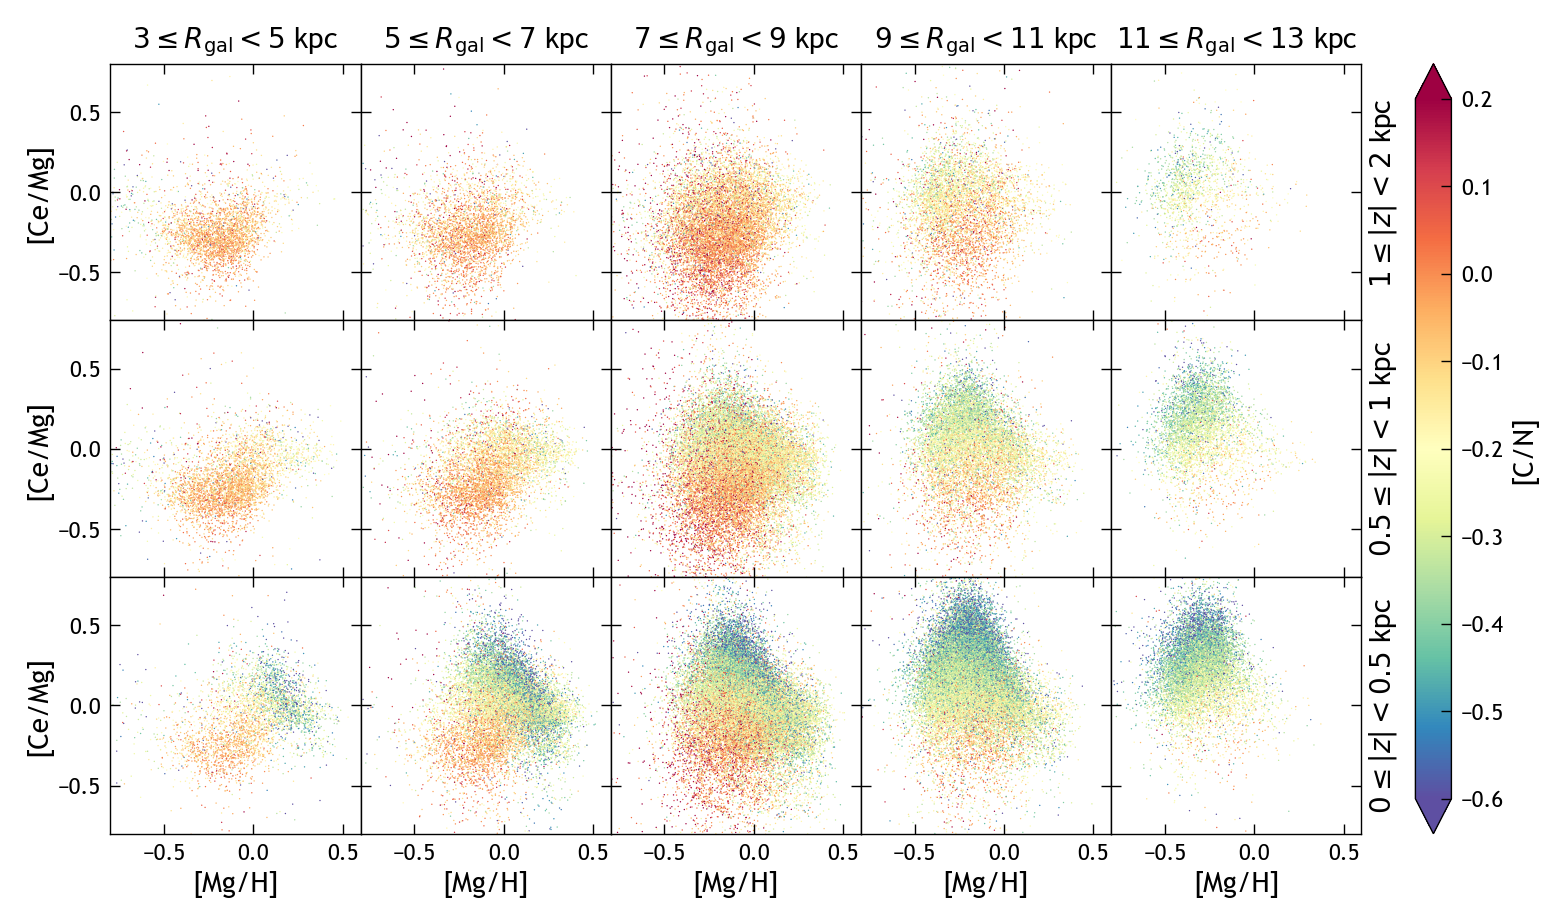

In [66]:
galr_bins = np.arange(3, 15, 2)
absz_bins = [0, 0.5, 1, 2]
alpha_buffer = 0.02

kwargs = dict(s=1, marker='.', rasterized=True, edgecolor='none')

fig, axs = plt.subplots(
    len(absz_bins)-1, len(galr_bins)-1,
    figsize=(9, 5), sharex=True, sharey=True,
    gridspec_kw={'hspace': 0, 'wspace': 0},
    dpi=200
)

for i, row in enumerate(axs):
    absz_lim = (absz_bins[-(i+2)], absz_bins[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (galr_bins[j], galr_bins[j+1])
        subset = mwm_rgb[
            (mwm_rgb['gal_r'] >= galr_lim[0]) &
            (mwm_rgb['gal_r'] < galr_lim[1]) &
            (mwm_rgb['gal_z'].abs() >= absz_lim[0]) &
            (mwm_rgb['gal_z'].abs() < absz_lim[1])
        ]
        pc = ax.scatter(subset['mg_h'], subset['ce_mg'], c=subset['c_n'], 
                   vmin=-0.6, vmax=0.2, cmap='Spectral_r', **kwargs)

# Format axes
axs[0,0].set_xlim((-0.8, 0.6))
axs[0,0].set_ylim((-0.8, 0.8))
for ax in axs[-1,:]:
    ax.set_xlabel('[Mg/H]')
for i, ax in enumerate(axs[0,:]):
    ax.set_title(r'$%s\leq R_{\rm gal}<%s$ kpc' % (galr_bins[i], galr_bins[i+1]), fontsize=10)
for ax in axs[:,0]:
    ax.set_ylabel('[Ce/Mg]')
for i, ax in enumerate(axs[:,-1]):
    ax.yaxis.set_label_position('right')
    ax.set_ylabel(r'$%s\leq |z|<%s$ kpc' % (absz_bins[-(i+2)], absz_bins[-(i+1)]))

# Colorbar
width = 0.02
pad = 0.03
plt.subplots_adjust(right=fig.subplotpars.right - (width + pad + 0.03))
height = fig.subplotpars.top - fig.subplotpars.bottom
cax = plt.axes([fig.subplotpars.right + pad, fig.subplotpars.bottom, 
                width, height])
fig.colorbar(pc, cax=cax, extend='both', label='[C/N]')

plt.show()

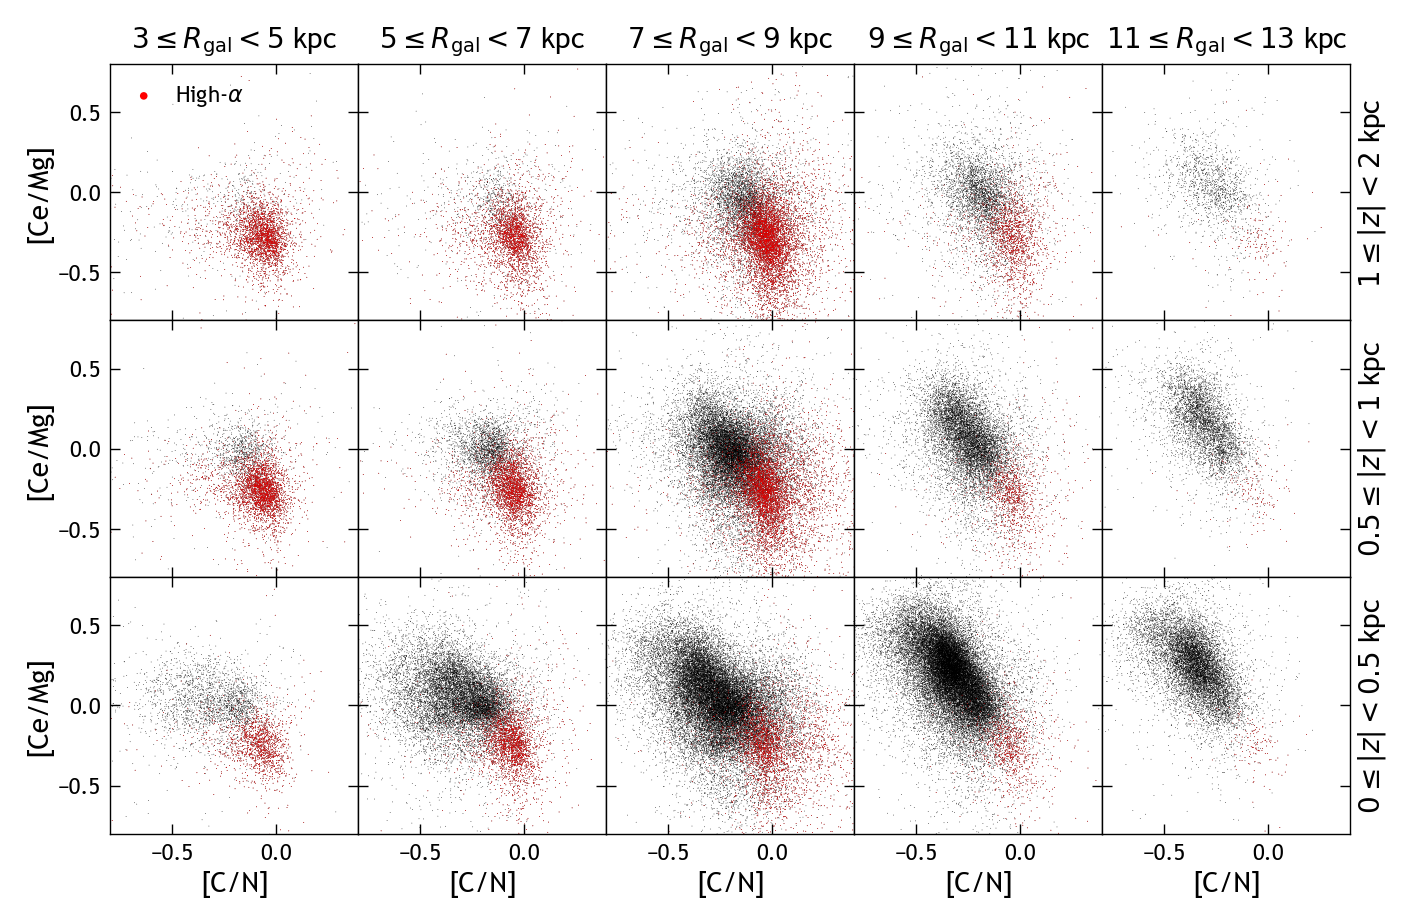

In [77]:
galr_bins = np.arange(3, 15, 2)
absz_bins = [0, 0.5, 1, 2]
alpha_buffer = 0.02

kwargs = dict(s=0.3, marker='.', rasterized=True, edgecolor='none')

fig, axs = plt.subplots(
    len(absz_bins)-1, len(galr_bins)-1,
    figsize=(8, 5), sharex=True, sharey=True,
    gridspec_kw={'hspace': 0, 'wspace': 0},
    dpi=200
)

for i, row in enumerate(axs):
    absz_lim = (absz_bins[-(i+2)], absz_bins[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (galr_bins[j], galr_bins[j+1])
        subset = mwm_rgb[
            (mwm_rgb['gal_r'] >= galr_lim[0]) &
            (mwm_rgb['gal_r'] < galr_lim[1]) &
            (mwm_rgb['gal_z'].abs() >= absz_lim[0]) &
            (mwm_rgb['gal_z'].abs() < absz_lim[1])
        ]
        ax.scatter(subset['c_n'], subset['ce_mg'], c='k', **kwargs)
        high_alpha = subset[
            subset['mg_fe'] > alpha_cut(subset['fe_h']) + alpha_buffer
        ]
        ax.scatter(high_alpha['c_n'], high_alpha['ce_mg'], c='r', 
                   label=r'High-$\alpha$', **kwargs)

# Format axes
axs[0,0].set_xlim((-0.8, 0.4))
axs[0,0].set_ylim((-0.8, 0.8))
for ax in axs[-1,:]:
    ax.set_xlabel('[C/N]')
for i, ax in enumerate(axs[0,:]):
    ax.set_title(r'$%s\leq R_{\rm gal}<%s$ kpc' % (galr_bins[i], galr_bins[i+1]), fontsize=10)
for ax in axs[:,0]:
    ax.set_ylabel('[Ce/Mg]')
for i, ax in enumerate(axs[:,-1]):
    ax.yaxis.set_label_position('right')
    ax.set_ylabel(r'$%s\leq |z|<%s$ kpc' % (absz_bins[-(i+2)], absz_bins[-(i+1)]))
axs[0,0].legend(markerscale=10)

plt.show()

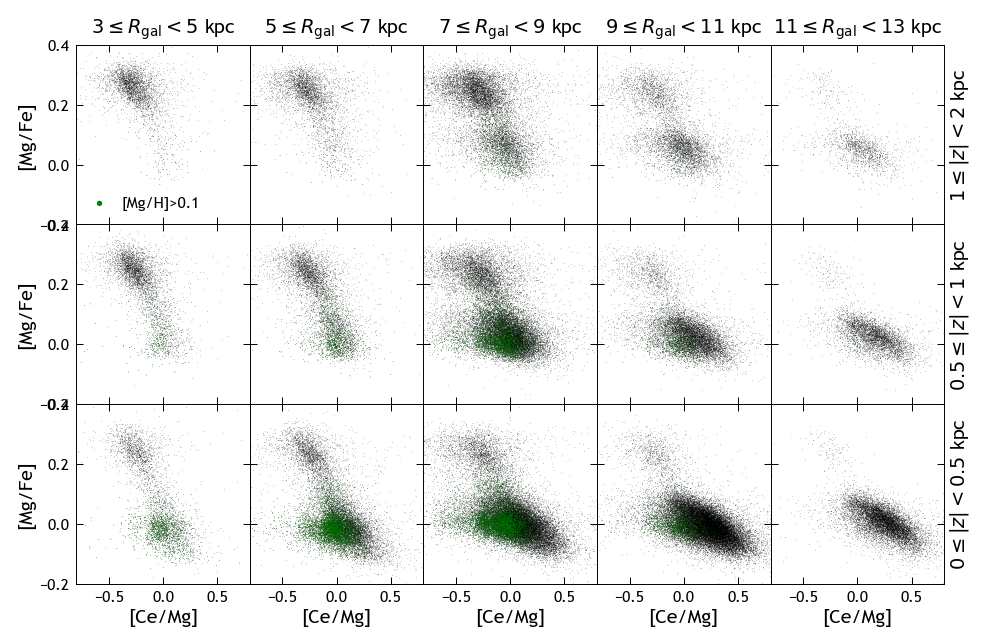

In [48]:
galr_bins = np.arange(3, 15, 2)
absz_bins = [0, 0.5, 1, 2]
alpha_buffer = 0.02

kwargs = dict(s=0.3, marker='.', rasterized=True, edgecolor='none')

fig, axs = plt.subplots(
    len(absz_bins)-1, len(galr_bins)-1,
    figsize=(8, 5), sharex=True, sharey=True,
    gridspec_kw={'hspace': 0, 'wspace': 0},
    dpi=140
)

for i, row in enumerate(axs):
    absz_lim = (absz_bins[-(i+2)], absz_bins[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (galr_bins[j], galr_bins[j+1])
        subset = mwm_rgb[
            (mwm_rgb['gal_r'] >= galr_lim[0]) &
            (mwm_rgb['gal_r'] < galr_lim[1]) &
            (mwm_rgb['gal_z'].abs() >= absz_lim[0]) &
            (mwm_rgb['gal_z'].abs() < absz_lim[1])
        ]
        ax.scatter(subset['ce_mg'], subset['mg_fe'], c='k', **kwargs)
        # high_alpha = subset[
        #     subset['mg_fe'] > alpha_cut(subset['fe_h']) + alpha_buffer
        # ]
        # ax.scatter(high_alpha['ce_mg'], high_alpha['mg_fe'], c='r', 
        #            label=r'High-$\alpha$', **kwargs)
        metal_rich = subset[subset['mg_h'] > 0.1]
        ax.scatter(metal_rich['ce_mg'], metal_rich['mg_fe'], c='g',
                   label='[Mg/H]>0.1', **kwargs)

# Format axes
axs[0,0].set_xlim((-0.8, 0.8))
axs[0,0].set_ylim((-0.2, 0.4))
for ax in axs[-1,:]:
    ax.set_xlabel('[Ce/Mg]')
for i, ax in enumerate(axs[0,:]):
    ax.set_title(r'$%s\leq R_{\rm gal}<%s$ kpc' % (galr_bins[i], galr_bins[i+1]), fontsize=10)
for ax in axs[:,0]:
    ax.set_ylabel('[Mg/Fe]')
for i, ax in enumerate(axs[:,-1]):
    ax.yaxis.set_label_position('right')
    ax.set_ylabel(r'$%s\leq |z|<%s$ kpc' % (absz_bins[-(i+2)], absz_bins[-(i+1)]))
axs[0,0].legend(markerscale=10)

plt.show()